# Model 2: Predicting NBA allstars from college basketball players

## Import libraries

In [1]:

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## Importing df

In [2]:
df = pd.read_csv('drafted_vs_allstar.csv', index_col = 0)
df.head()

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Allstar
0,Charles Jenkins,Hofstra,32,92.4,123.2,28.7,57.7,62.93,0.825,0.555,...,37.4062,0.5000,2.7188,4.6875,1.6562,0.6250,22.5000,Scoring PG,Yes,No
1,Vernon Macklin,Florida,37,59.7,107.5,24.3,59.3,57.77,0.451,0.593,...,24.4595,2.2162,3.1622,0.8108,0.3514,0.7027,11.5676,C,Yes,No
2,Ryan Reid,Florida St.,31,54.8,97.5,18.3,49.1,51.58,0.597,0.491,...,22.7097,1.8710,2.0968,1.1290,0.5806,0.5161,6.7742,C,Yes,No
3,Kyle Singler,Duke,37,86.9,112.3,23.5,49.1,53.64,0.806,0.497,...,34.7568,2.3784,4.4595,1.6216,0.9189,0.3243,16.8919,Wing F,Yes,No
4,Nolan Smith,Duke,37,85.1,114.0,30.8,50.8,56.40,0.813,0.501,...,34.0270,1.1892,3.2973,5.1081,1.2162,0.0811,20.6486,Scoring PG,Yes,No


## EDA

In [3]:
df.describe()

,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,TP_per,yr,...,pick,drtg,bpm,mp,oreb,dreb,ast,stl,blk,pts
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,32.526224,73.316958,112.570979,24.465734,54.100874,57.745997,0.738399,0.528710,0.319156,2.503497,...,29.680070,95.939817,6.979949,30.967626,1.664613,4.553459,2.539968,1.118861,0.917713,15.196426
std,5.457142,15.216656,8.319917,4.054551,5.316193,4.586455,0.094842,0.061302,0.139343,1.187348,...,17.120591,6.072616,2.870209,4.695157,0.975898,1.583531,1.718944,0.512160,0.837398,4.077729
min,3.000000,5.500000,85.000000,13.500000,40.700000,44.720000,0.295000,0.376000,0.000000,1.000000,...,1.000000,77.277900,-1.418120,7.481500,0.166700,1.411800,0.037000,0.096800,0.000000,3.000000
25%,31.000000,67.900000,107.500000,21.600000,50.475000,54.532500,0.685750,0.490000,0.288000,1.000000,...,14.750000,91.992925,5.042853,29.021450,0.812075,3.370650,1.290300,0.755100,0.320525,12.554625
50%,34.000000,77.250000,112.600000,24.400000,53.600000,57.410000,0.754000,0.523500,0.356500,2.000000,...,29.000000,96.556550,7.008250,31.981500,1.466850,4.349300,2.062550,1.012800,0.656650,15.420250
75%,36.000000,83.725000,117.900000,27.200000,57.200000,60.660000,0.806000,0.565000,0.400250,4.000000,...,44.250000,100.245500,8.848890,34.164075,2.385675,5.609150,3.446200,1.428600,1.228600,17.706575
max,41.000000,95.000000,141.900000,38.400000,76.900000,75.980000,0.957000,0.800000,1.000000,4.000000,...,60.000000,111.750000,17.668000,38.612900,5.750000,9.714300,9.939400,3.444400,5.258100,29.305600


Nothing abnormal stands out from descriptive statistics above. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 571
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  572 non-null    object 
 1   school       572 non-null    object 
 2   GP           572 non-null    int64  
 3   Min_per      572 non-null    float64
 4   ORtg         572 non-null    float64
 5   usg          572 non-null    float64
 6   eFG          572 non-null    float64
 7   TS_per       572 non-null    float64
 8   FT_per       572 non-null    float64
 9   twoP_per     572 non-null    float64
 10  TP_per       572 non-null    float64
 11  yr           572 non-null    int64  
 12  ht           572 non-null    int64  
 13  ast/tov      572 non-null    float64
 14  pick         572 non-null    float64
 15  drtg         572 non-null    float64
 16  bpm          572 non-null    float64
 17  mp           572 non-null    float64
 18  oreb         572 non-null    float64
 19  dreb    

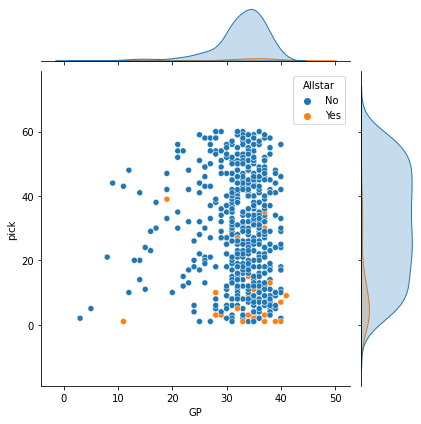

In [5]:
sns.jointplot(data=df, x='GP', y = 'pick', hue='Allstar')

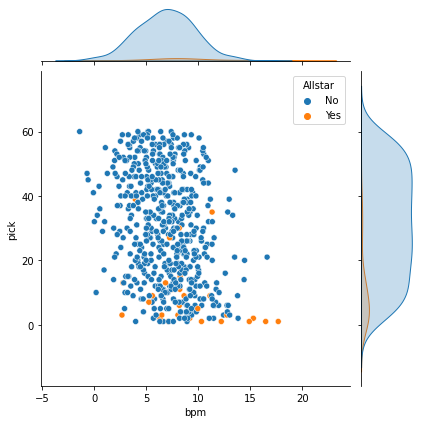

In [6]:
sns.jointplot(data=df, x='bpm', y = 'pick', hue='Allstar')

This scatter plot shows that low picks in our sample tend to have a high BPM

## Heatmap correlation matrix

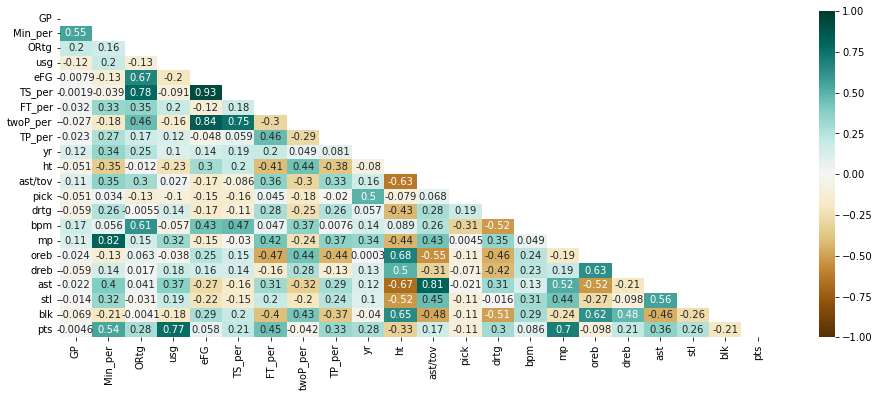

In [7]:

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

Some high correlations between my features: 
    
In order to avoid multicolinearity will drop 1 feature for these pairs that are over 80%correlated

In this case will drop Min_per, eFG, ast

In [8]:
df.drop(['ast','Min_per','eFG'], axis = 1, inplace= True)

### check balance for target variable

In [9]:
#target variable seems quite imbalanced, however will try a first baseline model so we can compare afterwards applying SMOTE
df['Allstar'].value_counts()

No     541
Yes     31
Name: Allstar, dtype: int64

### drop unnecessary columns

In [10]:
#features to drop 
df= df.drop(['school','player_name','drafted'], axis = 1)

In [11]:
# asign categorical value to college year

def college_year_num(df):
    
    if (df['yr'] == 1):
        return 'Freshman'
    elif (df['yr'] == 2):
        return 'Sophomore'
    elif (df['yr'] == 3):
        return 'Junior'
    elif (df['yr'] == 4):
        return 'Senior'
    else:
        return 'null'
    
df['yr'] = df.apply(college_year_num, axis = 1)

In [12]:
df["yr"].unique()

array(['Senior', 'Junior', 'Sophomore', 'Freshman'], dtype=object)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GP        572 non-null    int64  
 1   ORtg      572 non-null    float64
 2   usg       572 non-null    float64
 3   TS_per    572 non-null    float64
 4   FT_per    572 non-null    float64
 5   twoP_per  572 non-null    float64
 6   TP_per    572 non-null    float64
 7   yr        572 non-null    object 
 8   ht        572 non-null    int64  
 9   ast/tov   572 non-null    float64
 10  pick      572 non-null    float64
 11  drtg      572 non-null    float64
 12  bpm       572 non-null    float64
 13  mp        572 non-null    float64
 14  oreb      572 non-null    float64
 15  dreb      572 non-null    float64
 16  stl       572 non-null    float64
 17  blk       572 non-null    float64
 18  pts       572 non-null    float64
 19  role      572 non-null    object 
 20  Allstar   572 non-null    object

## Preparing data set for modeling

### Extracting numerical values

In [15]:
from sklearn.preprocessing import Normalizer

X = df.select_dtypes(include = np.number)

In [16]:
X.head()

,GP,ORtg,usg,TS_per,FT_per,twoP_per,TP_per,ht,ast/tov,pick,drtg,bpm,mp,oreb,dreb,stl,blk,pts
0,32,123.2,28.7,62.93,0.825,0.555,0.414,190,2.112628,44.0,107.8070,7.09443,37.4062,0.5000,2.7188,1.6562,0.6250,22.5000
1,37,107.5,24.3,57.77,0.451,0.593,0.000,208,0.476185,52.0,97.7281,3.88301,24.4595,2.2162,3.1622,0.3514,0.7027,11.5676
2,31,97.5,18.3,51.58,0.597,0.491,0.000,203,0.686239,57.0,93.5205,2.50667,22.7097,1.8710,2.0968,0.5806,0.5161,6.7742
3,37,112.3,23.5,53.64,0.806,0.497,0.321,203,0.857128,33.0,94.0388,5.95265,34.7568,2.3784,4.4595,0.9189,0.3243,16.8919
4,37,114.0,30.8,56.40,0.813,0.501,0.350,187,1.601687,21.0,94.9421,7.92525,34.0270,1.1892,3.2973,1.2162,0.0811,20.6486


In [17]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [18]:
x_nor = pd.DataFrame(x_normalized, columns=X.columns)

In [19]:
x_nor

,GP,ORtg,usg,TS_per,FT_per,twoP_per,TP_per,ht,ast/tov,pick,drtg,bpm,mp,oreb,dreb,stl,blk,pts
0,0.118750,0.457186,0.106503,0.233528,0.003062,0.002060,0.001536,0.705075,0.007840,0.163281,0.400063,0.026327,0.138811,0.001855,0.010089,0.006146,0.002319,0.083496
1,0.136816,0.397507,0.089855,0.213618,0.001668,0.002193,0.000000,0.769130,0.001761,0.192282,0.361373,0.014358,0.090445,0.008195,0.011693,0.001299,0.002598,0.042774
2,0.119546,0.375991,0.070571,0.198909,0.002302,0.001893,0.000000,0.782832,0.002646,0.219810,0.360645,0.009667,0.087576,0.007215,0.008086,0.002239,0.001990,0.026123
3,0.139739,0.424127,0.088753,0.202584,0.003044,0.001877,0.001212,0.766676,0.003237,0.124632,0.355159,0.022482,0.131267,0.008983,0.016842,0.003470,0.001225,0.063796
4,0.145594,0.448586,0.121197,0.221932,0.003199,0.001971,0.001377,0.735839,0.006303,0.082634,0.373594,0.031186,0.133895,0.004679,0.012975,0.004786,0.000319,0.081252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.110640,0.388766,0.104917,0.198732,0.001927,0.001995,0.000000,0.801186,0.002811,0.110640,0.352159,0.029024,0.073146,0.012893,0.016050,0.003026,0.003421,0.036178
568,0.095462,0.412398,0.081334,0.224108,0.002673,0.002093,0.000000,0.794248,0.001809,0.084007,0.342070,0.036690,0.078814,0.008095,0.017107,0.002902,0.009928,0.032228
569,0.101754,0.358879,0.100971,0.209300,0.002771,0.001957,0.001291,0.802291,0.000652,0.168285,0.355810,0.001748,0.080530,0.004666,0.019417,0.002258,0.003914,0.036577
570,0.109193,0.385005,0.110406,0.209124,0.002843,0.001982,0.001096,0.788613,0.003816,0.084928,0.377200,0.007864,0.101104,0.004194,0.009886,0.004493,0.001648,0.045535


### target variable to binary

In [20]:


def yesno(a):
    if a in ['Yes']:
        return 1 #Allstar
    else:
        return 0 #NotAllstar

df['allstar_new']=list(map(yesno,df['Allstar']))  #creates a new column for new allstar with 1 and 0


### Getting dummies

In [21]:
cat = df.select_dtypes(include = object)

In [22]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   yr       572 non-null    object
 1   role     572 non-null    object
 2   Allstar  572 non-null    object
dtypes: object(3)
memory usage: 13.5+ KB


In [23]:
cat = cat.drop(['Allstar'], axis=1)

In [24]:
categorical = pd.get_dummies(cat,columns=["yr", "role"])

In [25]:
categorical

,yr_Freshman,yr_Junior,yr_Senior,yr_Sophomore,role_C,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G
0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
567,1,0,0,0,1,0,0,0,0,0,0,0
568,1,0,0,0,1,0,0,0,0,0,0,0
569,1,0,0,0,0,0,1,0,0,0,0,0
570,1,0,0,0,0,0,0,0,0,0,0,1


### Isolating the target value

In [26]:
y = df["allstar_new"]

In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
567    0
568    0
569    0
570    0
571    0
Name: allstar_new, Length: 572, dtype: int64

### Concatenating x_nor and categorical_clean

In [28]:
X_full = pd.concat([x_nor, categorical], axis = 1)

In [29]:
X_full

,GP,ORtg,usg,TS_per,FT_per,twoP_per,TP_per,ht,ast/tov,pick,...,yr_Senior,yr_Sophomore,role_C,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G
0,0.118750,0.457186,0.106503,0.233528,0.003062,0.002060,0.001536,0.705075,0.007840,0.163281,...,1,0,0,0,0,0,1,0,0,0
1,0.136816,0.397507,0.089855,0.213618,0.001668,0.002193,0.000000,0.769130,0.001761,0.192282,...,1,0,1,0,0,0,0,0,0,0
2,0.119546,0.375991,0.070571,0.198909,0.002302,0.001893,0.000000,0.782832,0.002646,0.219810,...,1,0,1,0,0,0,0,0,0,0
3,0.139739,0.424127,0.088753,0.202584,0.003044,0.001877,0.001212,0.766676,0.003237,0.124632,...,1,0,0,0,0,0,0,0,1,0
4,0.145594,0.448586,0.121197,0.221932,0.003199,0.001971,0.001377,0.735839,0.006303,0.082634,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0.110640,0.388766,0.104917,0.198732,0.001927,0.001995,0.000000,0.801186,0.002811,0.110640,...,0,0,1,0,0,0,0,0,0,0
568,0.095462,0.412398,0.081334,0.224108,0.002673,0.002093,0.000000,0.794248,0.001809,0.084007,...,0,0,1,0,0,0,0,0,0,0
569,0.101754,0.358879,0.100971,0.209300,0.002771,0.001957,0.001291,0.802291,0.000652,0.168285,...,0,0,0,0,1,0,0,0,0,0
570,0.109193,0.385005,0.110406,0.209124,0.002843,0.001982,0.001096,0.788613,0.003816,0.084928,...,0,0,0,0,0,0,0,0,0,1


### Feature Correlation to target variable

In [119]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', df['allstar_new'].corr(df[column]))

GP --> 0.05195749262242262
ORtg --> 0.03975774350155488
usg --> 0.12096872121300761
TS_per --> 0.04459442716480756
FT_per --> 0.01789846760896297
twoP_per --> 0.03555266071511208
TP_per --> -0.009086377680146761
ht --> 0.012968400458843869
ast/tov --> -0.02724037739603283
pick --> -0.2826266224934581
drtg --> -0.11934621845353309
bpm --> 0.16205405550240157
mp --> 0.010148898129578265
oreb --> 0.08672680273841674
dreb --> 0.10562105217746882
stl --> 0.07134367360313029
blk --> 0.047572329653574844
pts --> 0.07797470305503686
allstar_new --> 1.0


The highest correlated values with the target variable seem to be:
    
    -Pick number
    
    -Box Plus Minus (BPM) - estimates a basketball player’s contribution to the team when that player is on the court.
    
    -Usage percentage (Usg%) - calculates the percentage of team plays a player was involved in, while he was on the floor. If the play ends in one of the three true results: field-goal attempts, free throws, or a turnover, it will count toward the player’s Usg%.
    
    -Defensive Rating (DRtg) - estimates how many points the player allowed per 100 possessions he individually faced while on the court.

### Importing libraries for modeling

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Model 1 - Normalizer X

### Defining LogisticRegression

In [31]:
lr =  LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr')

### Splitting dataset into train and test set

In [32]:
X_train, X_test, y_train, y_test = train_test_split (X_full, y, test_size = 0.3, random_state=40)

### Fitting the model to our training data set

In [33]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

## Evaluating Model 1

### Predicting the response for test dataset

In [34]:
y_pred=lr.predict(X_test)

### Obtaining the accuracy of the prediction

In [35]:
accuracy_score(y_test,y_pred)

0.9418604651162791

### Creating the confusion matrix

In [36]:
confusion_matrix(y_test,y_pred)

array([[162,   0],
       [ 10,   0]])

### Checking balance for target variable

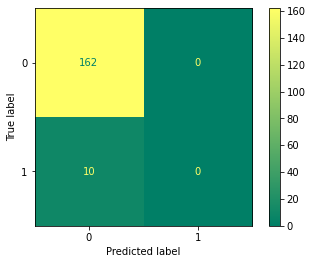

In [37]:
plot_confusion_matrix(lr, X_test, y_test, cmap="summer");

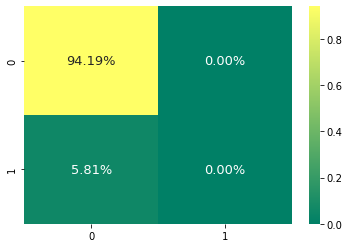

In [38]:
cnfmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_test), index = np.unique(y_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='summer',
            annot_kws = {'size':13}
           );

In [39]:
#current balance for target variable
df['allstar_new'].value_counts()

0    541
1     31
Name: allstar_new, dtype: int64

As previously mentioned, the data is very imbalanced. Due to this we have a good accuracy predicting 'No' but unable predict 'Yes'. Will try applying an oversampling model

## Model 2 - Implementing SMOTE method

In [40]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

### Applying SMOTE to X and Y

In [41]:
X_sm, y_sm =smote.fit_resample(X_full,y)

### Splitting X_sm and y_sm into train and test set

In [42]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split (X_sm, y_sm, test_size = 0.3, random_state=40)


### Analysing the change in the distribution

In [43]:
y_train.value_counts()

0    379
1     21
Name: allstar_new, dtype: int64

In [44]:
y_sm_train.value_counts()

1    381
0    376
Name: allstar_new, dtype: int64

In [45]:
y_sm_test.value_counts()

0    165
1    160
Name: allstar_new, dtype: int64

### Fitting the model to our smote training dataset

In [46]:
lr.fit(X_sm_train,y_sm_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

## Evaluating Model 2

### Predicting the response for smote test dataset

In [47]:
y_pred_sm = lr.predict(X_sm_test)

### Obtaining the accuracy of the prediction

In [48]:
accuracy_score(y_sm_test,y_pred_sm)

0.8738461538461538

### Creating the new confusion matrix

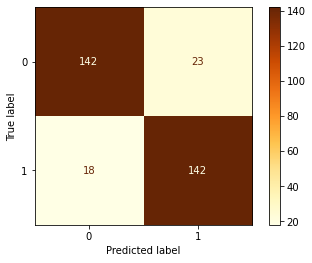

In [49]:
plot_confusion_matrix(lr, X_sm_test, y_sm_test, cmap="YlOrBr");

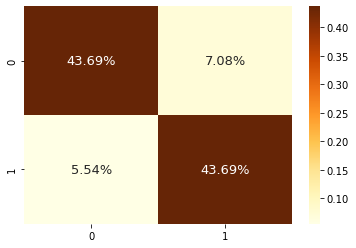

In [116]:
cnfmat = confusion_matrix(y_sm_test, y_pred_sm)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_sm_test), index = np.unique(y_sm_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

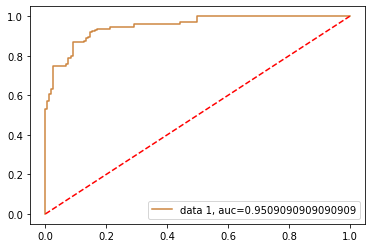

In [118]:
y_sm_pred_proba = lr.predict_proba(X_sm_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_sm_test,  y_sm_pred_proba)
auc = metrics.roc_auc_score(y_sm_test, y_sm_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color='peru')
plt.plot([0,1],[0,1],'r--') 
plt.legend(loc=4)
plt.show()

Conclusion: 
    
The model using smote has a 88% of accuracy and a reasonable balance between predicting the 'Yes' and the 'No'.
    

## Test the model on the NBA Rookies 2021

### Importing and reading dataset

In [53]:
rookies_df = pd.read_csv('Nba2021draftpicks.csv', sep=';')

In [54]:
rookies_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Round 1,Unnamed: 4,Unnamed: 5,Totals,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Per Game,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
1,1,1,DET,Cade Cunningham,Oklahoma State,1,21,674,331,131,...,.322,.826,32.1,15.8,6.2,4.6,-0.5,-.032,-2.4,-0.1
2,2,2,HOU,Jalen Green,NaN,1,18,555,252,56,...,.278,.807,30.8,14.0,3.1,2.3,-0.5,-.041,-5.8,-0.5
3,3,3,CLE,Evan Mobley,USC,1,24,805,335,203,...,.333,.775,33.5,14.0,8.5,2.5,2.3,.138,1.0,0.6
4,4,4,TOR,Scottie Barnes,Florida State,1,24,864,362,200,...,.340,.723,36.0,15.1,8.3,3.3,2.1,.118,0.3,0.5


### Cleaning df

In [55]:
#replace header row for top row
rookies_df = rookies_df.rename(columns=rookies_df.iloc[0]).drop(rookies_df.index[0])


In [56]:
rookies_df

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
1,1,1,DET,Cade Cunningham,Oklahoma State,1,21,674,331,131,...,.322,.826,32.1,15.8,6.2,4.6,-0.5,-.032,-2.4,-0.1
2,2,2,HOU,Jalen Green,NaN,1,18,555,252,56,...,.278,.807,30.8,14.0,3.1,2.3,-0.5,-.041,-5.8,-0.5
3,3,3,CLE,Evan Mobley,USC,1,24,805,335,203,...,.333,.775,33.5,14.0,8.5,2.5,2.3,.138,1.0,0.6
4,4,4,TOR,Scottie Barnes,Florida State,1,24,864,362,200,...,.340,.723,36.0,15.1,8.3,3.3,2.1,.118,0.3,0.5
5,5,5,ORL,Jalen Suggs,Gonzaga,1,21,583,258,71,...,.255,.763,27.8,12.3,3.4,3.6,-1.1,-.091,-6.8,-0.7
6,6,6,OKC,Josh Giddey,NaN,1,24,710,250,161,...,.247,.700,29.6,10.4,6.7,5.8,-0.1,-.006,-3.0,-0.2
7,7,7,GSW,Jonathan Kuminga,NaN,1,16,114,53,26,...,.133,.600,7.1,3.3,1.6,0.3,0.2,.072,-5.3,-0.1
8,8,8,ORL,Franz Wagner,Michigan,1,28,896,400,124,...,.390,.791,32.0,14.3,4.4,2.8,1.4,.075,-1.0,0.2
9,9,9,SAC,Davion Mitchell,Baylor,1,27,689,260,68,...,.299,.667,25.5,9.6,2.5,3.5,0.4,.026,-3.7,-0.3
10,10,10,NOP,Ziaire Williams,Stanford,1,19,339,90,28,...,.246,.667,17.8,4.7,1.5,0.6,-0.1,-.021,-8.3,-0.5


In [57]:
rookies_df.shape

(60, 22)

In [58]:
# checking overseas players or that didn't go to college in USA
rookies_df['College'].unique()

array(['Oklahoma State', nan, 'USC', 'Florida State', 'Gonzaga',
       'Michigan', 'Baylor', 'Stanford', 'UConn', 'Alabama', 'Oregon',
       'Arkansas', 'Virginia', 'Florida', 'Texas', 'Duke', 'Tennessee',
       'Kentucky', 'Arizona State', 'Houston', 'VCU', 'LSU', 'UNC',
       'Loyola (MD)', 'Villanova', 'Ohio University', 'West Virginia',
       'Auburn', 'Illinois', 'Utah State University', 'Iowa',
       'Pepperdine', 'Nebraska', 'Louisville', 'Creighton',
       'Western Kentucky', 'Seton Hall', 'Maryland'], dtype=object)

In [59]:
no_college=rookies_df.loc[rookies_df['College'].isnull()]

In [60]:
no_college['Player']

2              Jalen Green
6              Josh Giddey
7         Jonathan Kuminga
16          Alperen Şengün
23            Usman Garuba
31             Isaiah Todd
34        Rokas Jokubaitis
45          Juhann Begarin
60    Georgios Kalaitzakis
Name: Player, dtype: object

The above list of 9 players won't appear in the college data frame. (The ones with the full NaN row are players that were drafted but never joined the NBA)

### Brining college players dataset

The new DF show the Nba players that were selected in the last draft. As I want to test the model with them, I will create a new data drame with their college stats to apply Allstar prediction.

In [61]:
college_players = pd.read_csv('college_data.csv', index_col = 0)
college_players.head()

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,bpm,mp,oreb,dreb,ast,stl,blk,pts,role,drafted
1,DeAndrae Ross,Troy,7,11.5,67.1,16.9,34.5,36.11,0.500,0.364,...,-10.394000,18.8571,0.5714,1.1429,1.4286,0.1429,0.0000,3.2857,Wing G,No
2,Pooh Williams,Utah St.,33,64.5,105.6,18.7,48.1,52.40,0.815,0.394,...,1.125160,26.0000,0.1515,1.4848,2.0909,0.2121,0.0909,8.6667,Combo G,No
11,Dana Smith,Longwood,27,81.8,99.8,27.7,49.9,53.76,0.658,0.483,...,-0.441037,32.7037,2.1481,4.9259,2.4074,0.8148,0.4815,17.5556,Wing F,No
26,Carlos Strong,Boston University,35,76.2,118.1,16.4,58.8,60.93,0.682,0.478,...,6.077490,30.6857,1.3429,3.2286,1.8000,1.6571,0.4000,10.8571,Combo G,No
27,Sherrod Smith,Boston University,29,9.5,60.7,6.9,8.3,14.93,0.300,0.100,...,-4.128490,4.6207,0.1379,0.5862,0.2069,0.1034,0.0345,0.1724,Wing G,No


In [62]:
# get only drafted players from college
drafted_df=college_players.loc[college_players['drafted'] == 'Yes']
drafted_df.head()

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,bpm,mp,oreb,dreb,ast,stl,blk,pts,role,drafted
48,Charles Jenkins,Hofstra,32,92.4,123.2,28.7,57.7,62.93,0.825,0.555,...,7.09443,37.4062,0.5000,2.7188,4.6875,1.6562,0.6250,22.5000,Scoring PG,Yes
79,Vernon Macklin,Florida,37,59.7,107.5,24.3,59.3,57.77,0.451,0.593,...,3.88301,24.4595,2.2162,3.1622,0.8108,0.3514,0.7027,11.5676,C,Yes
167,Ryan Reid,Florida St.,31,54.8,97.5,18.3,49.1,51.58,0.597,0.491,...,2.50667,22.7097,1.8710,2.0968,1.1290,0.5806,0.5161,6.7742,C,Yes
171,Kyle Singler,Duke,37,86.9,112.3,23.5,49.1,53.64,0.806,0.497,...,5.95265,34.7568,2.3784,4.4595,1.6216,0.9189,0.3243,16.8919,Wing F,Yes
172,Nolan Smith,Duke,37,85.1,114.0,30.8,50.8,56.40,0.813,0.501,...,7.92525,34.0270,1.1892,3.2973,5.1081,1.2162,0.0811,20.6486,Scoring PG,Yes


### Creating new df with nba rookies and their college stats

In [63]:
#from drafted df create a new column for 2021 rookies
drafted_df['Rookies'] = np.where(drafted_df.player_name.isin(rookies_df.Player), 'Yes', 'No')



In [64]:
drafted_df.head()

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies
48,Charles Jenkins,Hofstra,32,92.4,123.2,28.7,57.7,62.93,0.825,0.555,...,37.4062,0.5000,2.7188,4.6875,1.6562,0.6250,22.5000,Scoring PG,Yes,No
79,Vernon Macklin,Florida,37,59.7,107.5,24.3,59.3,57.77,0.451,0.593,...,24.4595,2.2162,3.1622,0.8108,0.3514,0.7027,11.5676,C,Yes,No
167,Ryan Reid,Florida St.,31,54.8,97.5,18.3,49.1,51.58,0.597,0.491,...,22.7097,1.8710,2.0968,1.1290,0.5806,0.5161,6.7742,C,Yes,No
171,Kyle Singler,Duke,37,86.9,112.3,23.5,49.1,53.64,0.806,0.497,...,34.7568,2.3784,4.4595,1.6216,0.9189,0.3243,16.8919,Wing F,Yes,No
172,Nolan Smith,Duke,37,85.1,114.0,30.8,50.8,56.40,0.813,0.501,...,34.0270,1.1892,3.2973,5.1081,1.2162,0.0811,20.6486,Scoring PG,Yes,No


In [65]:
# put rookies for 2021 into a new df
rookies2021=drafted_df.loc[drafted_df['Rookies'] == 'Yes']
rookies2021.shape

(46, 27)

Only 9 players should be missing from the list as they are the ones that didn't go to college. The final result should be 51 rows. Will check for missing players

### Find missing rookies

In [66]:
dif_list = [x for x in list(rookies_df['Player'].unique()) if x not in list(drafted_df['player_name'].unique())]


In [67]:
dif_list

['Jalen Green',
 'Josh Giddey',
 'Jonathan Kuminga',
 'Alperen Şengün',
 'Usman Garuba',
 'Bones Hyland',
 'Isaiah Todd',
 'Rokas Jokubaitis',
 'Herb Jones',
 'Juhann Begarin',
 'Filip Petrušev',
 'Balša Koprivica',
 'RaiQuan Gray',
 'Georgios Kalaitzakis']

In [68]:
# compare it with rookies that didn't go to college
no_college['Player']

2              Jalen Green
6              Josh Giddey
7         Jonathan Kuminga
16          Alperen Şengün
23            Usman Garuba
31             Isaiah Todd
34        Rokas Jokubaitis
45          Juhann Begarin
60    Georgios Kalaitzakis
Name: Player, dtype: object

In [69]:
no_college_list = no_college['Player'].tolist()

In [70]:
#finding missing players from our df
missing = [x for x in dif_list if x not in no_college_list]

In [71]:
missing

['Bones Hyland',
 'Herb Jones',
 'Filip Petrušev',
 'Balša Koprivica',
 'RaiQuan Gray']

### locate rookies missing in our data set

Bones Hyland

In [72]:
drafted_df[drafted_df['player_name'].str.contains("Hyland")]

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies
24183,Nah'Shon Hyland,VCU,24,73.3,106.0,28.7,54.9,59.6,0.862,0.539,...,31.9167,0.1667,4.5417,2.0833,1.875,0.1667,19.4583,Combo G,Yes,No


In [73]:
rookies_df.loc[rookies_df['Player'] == 'Bones Hyland' , 'Player'] = "Nah'Shon Hyland"


Herb Jones

In [74]:
drafted_df[drafted_df['player_name'].str.contains("Herb")]

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies
21339,Herbert Jones,Alabama,33,67.9,103.3,24.3,48.1,52.89,0.715,0.47,...,27.2727,2.4848,4.0909,3.2727,1.7273,1.1212,11.2424,Wing F,Yes,No


In [75]:
rookies_df.loc[rookies_df['Player'] == 'Herb Jones' , 'Player'] = 'Herbert Jones'


RaiQuan Gray

In [76]:
drafted_df[drafted_df['player_name'].str.contains("Gray")]

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies
15354,Grayson Allen,Duke,37,88.3,121.1,20.3,53.6,57.97,0.850,0.503,...,35.5676,0.5405,2.7838,4.6486,1.7297,0.0541,15.4595,Scoring PG,Yes,No
21965,Raiquan Gray,Florida St.,25,65.1,109.9,23.5,53.6,58.20,0.763,0.558,...,26.3200,1.4800,4.9200,2.2000,1.2000,0.7200,11.8800,Wing F,Yes,No


In [77]:
rookies_df.loc[rookies_df['Player'] == 'RaiQuan Gray' , 'Player'] = 'Raiquan Gray'


Filip Petrušev

In [78]:
drafted_df[drafted_df['player_name'].str.contains("Petrusev")]

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies
22276,Filip Petrusev,Gonzaga,33,64.5,114.6,30.4,56.5,59.38,0.655,0.573,...,25.8788,2.3636,5.5758,1.4545,0.6061,0.7879,17.4545,C,Yes,No


In [79]:

rookies_df.loc[rookies_df['Player'] == 'Filip Petrušev' , 'Player'] = 'Filip Petrusev'


Balša Koprivica

In [80]:
drafted_df[drafted_df['player_name'].str.contains("Balsa")]

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies


In [81]:
drafted_df[drafted_df['player_name'].str.contains("Kop")]

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies


Can't find the rookie Balsa Koprivica in the college players df.

### Get corrected names into rookies2021 df

In [82]:
#from drafted df create a new column for 2021 rookies
drafted_df['Rookies'] = np.where(drafted_df.player_name.isin(rookies_df.Player), 'Yes', 'No')

In [83]:
# add 2021 rookies into a new df
rookies2021=drafted_df.loc[drafted_df['Rookies'] == 'Yes']
rookies2021.shape

(50, 27)

In [84]:
rookies2021.head()

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,mp,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies
20215,Isaiah Livers,Michigan,23,64.6,121.9,18.9,57.0,60.53,0.870,0.486,...,31.6087,1.0870,4.9130,2.0000,0.5652,0.7391,13.0870,Wing F,Yes,Yes
20390,Sandro Mamukelashvili,Seton Hall,27,87.8,100.6,28.6,48.8,52.54,0.714,0.481,...,35.5926,1.8519,5.7037,3.2222,1.0741,0.5556,17.5185,Wing F,Yes,Yes
20783,Corey Kispert,Gonzaga,32,79.2,131.2,20.7,64.4,67.38,0.878,0.628,...,31.8125,0.9375,4.0312,1.8125,0.9062,0.4375,18.5938,Wing G,Yes,Yes
20967,Jericho Sims,Texas,26,58.3,112.1,18.3,68.6,65.04,0.520,0.691,...,24.5385,2.1538,5.0769,0.6538,0.7308,1.0769,9.2308,C,Yes,Yes
21020,Davion Mitchell,Baylor,30,80.8,122.1,21.6,61.3,62.00,0.652,0.565,...,32.4667,0.4667,2.2000,5.5000,1.9000,0.3667,14.0667,Pure PG,Yes,Yes


In [85]:
rookies2021=rookies2021.reset_index(drop=True)

In [86]:
rookies2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  50 non-null     object 
 1   school       50 non-null     object 
 2   GP           50 non-null     int64  
 3   Min_per      50 non-null     float64
 4   ORtg         50 non-null     float64
 5   usg          50 non-null     float64
 6   eFG          50 non-null     float64
 7   TS_per       50 non-null     float64
 8   FT_per       50 non-null     float64
 9   twoP_per     50 non-null     float64
 10  TP_per       50 non-null     float64
 11  yr           50 non-null     int64  
 12  ht           50 non-null     int64  
 13  ast/tov      50 non-null     float64
 14  pick         50 non-null     float64
 15  drtg         50 non-null     float64
 16  bpm          50 non-null     float64
 17  mp           50 non-null     float64
 18  oreb         50 non-null     float64
 19  dreb      

### Feature engineering to mirror model 2 df structure to prepare rookies2021 df to be tested

In [87]:
### Dropping unnecessary columns

rookies2021new=rookies2021.drop(['school','player_name','drafted','ast','Min_per','eFG','Rookies'], axis = 1)


In [88]:
rookies2021new.reset_index(drop=True, inplace=True)

In [89]:
# asign categorical value to college year

def college_year_num(rookies2021new):
    
    if (rookies2021new['yr'] == 1):
        return 'Freshman'
    elif (rookies2021new['yr'] == 2):
        return 'Sophomore'
    elif (rookies2021new['yr'] == 3):
        return 'Junior'
    elif (rookies2021new['yr'] == 4):
        return 'Senior'
    else:
        return 'null'
    
rookies2021new['yr'] = rookies2021new.apply(college_year_num, axis = 1)

In [90]:
rookies2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  50 non-null     object 
 1   school       50 non-null     object 
 2   GP           50 non-null     int64  
 3   Min_per      50 non-null     float64
 4   ORtg         50 non-null     float64
 5   usg          50 non-null     float64
 6   eFG          50 non-null     float64
 7   TS_per       50 non-null     float64
 8   FT_per       50 non-null     float64
 9   twoP_per     50 non-null     float64
 10  TP_per       50 non-null     float64
 11  yr           50 non-null     int64  
 12  ht           50 non-null     int64  
 13  ast/tov      50 non-null     float64
 14  pick         50 non-null     float64
 15  drtg         50 non-null     float64
 16  bpm          50 non-null     float64
 17  mp           50 non-null     float64
 18  oreb         50 non-null     float64
 19  dreb      

### Preparing numerical values

In [91]:
from sklearn.preprocessing import Normalizer

X_test = rookies2021new.select_dtypes(include = np.number)

In [92]:
X_test.head()

,GP,ORtg,usg,TS_per,FT_per,twoP_per,TP_per,ht,ast/tov,pick,drtg,bpm,mp,oreb,dreb,stl,blk,pts
0,23,121.9,18.9,60.53,0.870,0.486,0.431,200,1.769285,42.0,95.9651,9.32754,31.6087,1.0870,4.9130,0.5652,0.7391,13.0870
1,27,100.6,28.6,52.54,0.714,0.481,0.336,210,0.977520,54.0,100.5100,4.79842,35.5926,1.8519,5.7037,1.0741,0.5556,17.5185
2,32,131.2,20.7,67.38,0.878,0.628,0.440,200,1.380952,15.0,95.9101,9.90794,31.8125,0.9375,4.0312,0.9062,0.4375,18.5938
3,26,112.1,18.3,65.04,0.520,0.691,0.000,208,0.404729,58.0,92.7025,6.58968,24.5385,2.1538,5.0769,0.7308,1.0769,9.2308
4,30,122.1,21.6,62.00,0.652,0.565,0.447,187,2.260305,9.0,95.1321,9.22088,32.4667,0.4667,2.2000,1.9000,0.3667,14.0667


In [93]:
transformer = Normalizer()
transformer.fit(X_test)
x_test_normalized = transformer.transform(X_test)

In [94]:
x_test_nor = pd.DataFrame(x_test_normalized, columns=X_test.columns)

In [95]:
x_test_nor.head()

,GP,ORtg,usg,TS_per,FT_per,twoP_per,TP_per,ht,ast/tov,pick,drtg,bpm,mp,oreb,dreb,stl,blk,pts
0,0.085913,0.455336,0.070598,0.226099,0.003250,0.001815,0.001610,0.747065,0.006609,0.156884,0.358461,0.034841,0.118069,0.004060,0.018352,0.002111,0.002761,0.048884
1,0.099807,0.371874,0.105722,0.194217,0.002639,0.001778,0.001242,0.776278,0.003613,0.199614,0.371541,0.017738,0.131570,0.006846,0.021084,0.003970,0.002054,0.064758
2,0.117549,0.481952,0.076040,0.247515,0.003225,0.002307,0.001616,0.734683,0.005073,0.055101,0.352318,0.036396,0.116861,0.003444,0.014808,0.003329,0.001607,0.068303
3,0.095712,0.412665,0.067366,0.239427,0.001914,0.002544,0.000000,0.765695,0.001490,0.213511,0.341259,0.024258,0.090332,0.007929,0.018689,0.002690,0.003964,0.033981
4,0.117156,0.476826,0.084353,0.242123,0.002546,0.002206,0.001746,0.730274,0.008827,0.035147,0.371511,0.036009,0.126789,0.001823,0.008591,0.007420,0.001432,0.054933


### Getting dummies

In [96]:
cat_test = rookies2021new.select_dtypes(include = object)

In [97]:
cat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   yr      50 non-null     object
 1   role    50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


In [98]:
categorical_test = pd.get_dummies(cat_test,columns=["yr", "role"])

In [99]:
categorical_test

,yr_Freshman,yr_Junior,yr_Senior,yr_Sophomore,role_C,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G
0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,1,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,1,0


### Concatenating x_nor and categorical_clean

In [100]:
X_full_test = pd.concat([x_test_nor, categorical_test], axis = 1)

In [101]:
X_full_test.head()

,GP,ORtg,usg,TS_per,FT_per,twoP_per,TP_per,ht,ast/tov,pick,...,yr_Senior,yr_Sophomore,role_C,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G
0,0.085913,0.455336,0.070598,0.226099,0.003250,0.001815,0.001610,0.747065,0.006609,0.156884,...,1,0,0,0,0,0,0,0,1,0
1,0.099807,0.371874,0.105722,0.194217,0.002639,0.001778,0.001242,0.776278,0.003613,0.199614,...,1,0,0,0,0,0,0,0,1,0
2,0.117549,0.481952,0.076040,0.247515,0.003225,0.002307,0.001616,0.734683,0.005073,0.055101,...,1,0,0,0,0,0,0,0,0,1
3,0.095712,0.412665,0.067366,0.239427,0.001914,0.002544,0.000000,0.765695,0.001490,0.213511,...,1,0,1,0,0,0,0,0,0,0
4,0.117156,0.476826,0.084353,0.242123,0.002546,0.002206,0.001746,0.730274,0.008827,0.035147,...,0,0,0,0,0,1,0,0,0,0


In [102]:
y_pred_test = lr.predict(X_full_test)

In [103]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0])

In [104]:
rookies2021['player_name']

0              Isaiah Livers
1      Sandro Mamukelashvili
2              Corey Kispert
3               Jericho Sims
4            Davion Mitchell
5                 Luka Garza
6              Herbert Jones
7          Marcus Zegarowski
8             Quentin Grimes
9            Trey Murphy III
10             Jason Preston
11              Raiquan Gray
12            Charles Bassey
13             Dalano Banton
14            Filip Petrusev
15              Jared Butler
16           Kessler Edwards
17               Ayo Dosunmu
18             Aaron Wiggins
19              Joe Wieskamp
20             Neemias Queta
21           James Bouknight
22              Franz Wagner
23             David Johnson
24           Nah'Shon Hyland
25              Chris Duarte
26                  Tre Mann
27             Scottie Lewis
28              Santi Aldama
29             Miles McBride
30    Jeremiah Robinson-Earl
31                 Kai Jones
32           Cade Cunningham
33            Scottie Barnes
34            

In [105]:
rookies2021['Allstar_prediction'] = y_pred_test.tolist()

In [106]:
#converting pick to integer
rookies2021 = rookies2021.astype({"pick":'int64'}) 
rookies2021.dtypes

player_name            object
school                 object
GP                      int64
Min_per               float64
ORtg                  float64
usg                   float64
eFG                   float64
TS_per                float64
FT_per                float64
twoP_per              float64
TP_per                float64
yr                      int64
ht                      int64
ast/tov               float64
pick                    int64
drtg                  float64
bpm                   float64
mp                    float64
oreb                  float64
dreb                  float64
ast                   float64
stl                   float64
blk                   float64
pts                   float64
role                   object
drafted                object
Rookies                object
Allstar_prediction      int64
dtype: object

In [107]:
rookies2021[['player_name','pick', 'Allstar_prediction']]

,player_name,pick,Allstar_prediction
0,Isaiah Livers,42,0
1,Sandro Mamukelashvili,54,0
2,Corey Kispert,15,0
3,Jericho Sims,58,0
4,Davion Mitchell,9,0
5,Luka Garza,52,0
6,Herbert Jones,35,0
7,Marcus Zegarowski,49,0
8,Quentin Grimes,25,0
9,Trey Murphy III,17,0


In [112]:
# checking potential allstars according to my model
Future_allstars=rookies2021.loc[rookies2021['Allstar_prediction'] == 1]

In [113]:
Future_allstars

,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,oreb,dreb,ast,stl,blk,pts,role,drafted,Rookies,Allstar_prediction
32,Cade Cunningham,Oklahoma St.,27,78.0,104.1,28.6,51.6,57.46,0.846,0.463,...,0.7037,5.4815,3.4444,1.5926,0.7778,20.2222,Wing F,Yes,Yes,1
33,Scottie Barnes,Florida St.,24,58.9,107.5,25.3,53.1,54.78,0.621,0.561,...,1.4583,2.5417,4.0833,1.4583,0.4583,10.3333,Scoring PG,Yes,Yes,1
37,Ziaire Williams,Stanford,20,50.7,85.0,25.8,43.1,47.29,0.796,0.427,...,0.5000,4.0500,2.2000,0.8500,0.5500,10.7000,Wing F,Yes,Yes,1
39,Evan Mobley,USC,33,83.6,119.4,23.4,59.5,62.40,0.694,0.615,...,2.7273,5.9394,2.3939,0.7879,2.8485,16.3636,C,Yes,Yes,1
45,Day'Ron Sharpe,North Carolina,29,47.9,101.9,27.5,51.9,52.09,0.505,0.523,...,3.3793,4.2069,1.4483,0.7931,0.8966,9.4828,C,Yes,Yes,1
46,Isaiah Jackson,Kentucky,25,51.1,108.0,21.3,54.0,58.69,0.700,0.548,...,2.1200,4.4800,0.7200,0.7600,2.6000,8.4400,C,Yes,Yes,1


In [114]:
#saving to csv file
rookies2021.to_csv('rookies2021.csv')

In [115]:
rookies2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_name         50 non-null     object 
 1   school              50 non-null     object 
 2   GP                  50 non-null     int64  
 3   Min_per             50 non-null     float64
 4   ORtg                50 non-null     float64
 5   usg                 50 non-null     float64
 6   eFG                 50 non-null     float64
 7   TS_per              50 non-null     float64
 8   FT_per              50 non-null     float64
 9   twoP_per            50 non-null     float64
 10  TP_per              50 non-null     float64
 11  yr                  50 non-null     int64  
 12  ht                  50 non-null     int64  
 13  ast/tov             50 non-null     float64
 14  pick                50 non-null     int64  
 15  drtg                50 non-null     float64
 16  bpm       